In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import Spectral, Plasma

In [6]:
N = 61
domain = "symmetric"
method = "FD"
spectral = Spectral(N, domain, method)

D1 = spectral.D1
D2 = spectral.D2
x = spectral.x

I = np.eye(*D1.shape)
C = I[[0,-1],:] # constraint matrix: dirichlet at first and last mesh point

In [8]:
r = [0,-1] # removed degrees of freedom
k = list(range(1,N-1)) # kept degrees of freedom

In [9]:
# give-back matrix G = C_r^{-1}@C_k
G = -np.linalg.solve(C[:,r], C[:,k]) 

In [19]:
A = D2 # operator
AA = A[1:N-1,1:N-1] + A[1:N-1,r]@G # implement boundary conditions

In [26]:
e,V = np.linalg.eig(AA)
V = np.pad(V, ((1,1),(0,0)), 'constant', constant_values=0)

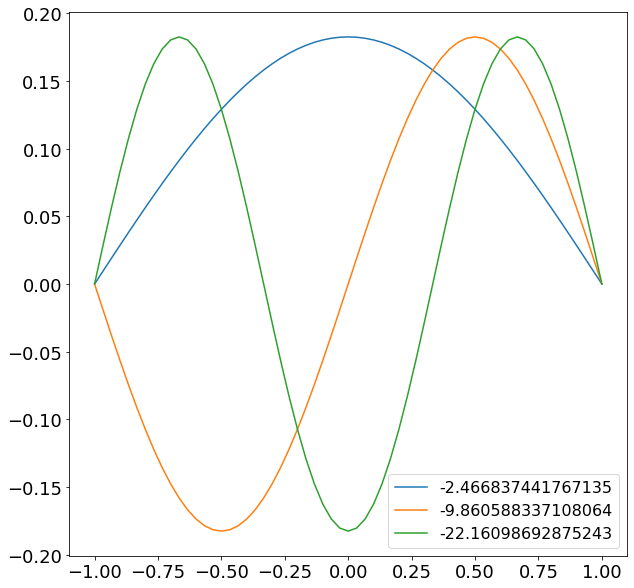

In [28]:
for i in range(3):
    plt.plot(x, V[:,i], label=e[i])
plt.legend();

In [34]:

V,e = polyeig(I, D1, D2)

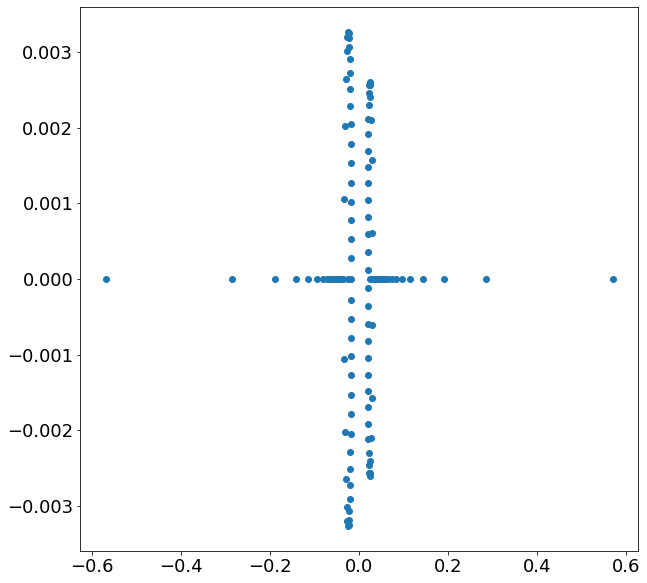

In [37]:
plt.plot(np.real(e), np.imag(e), 'o')

/home/practice/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/practice/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/practice/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


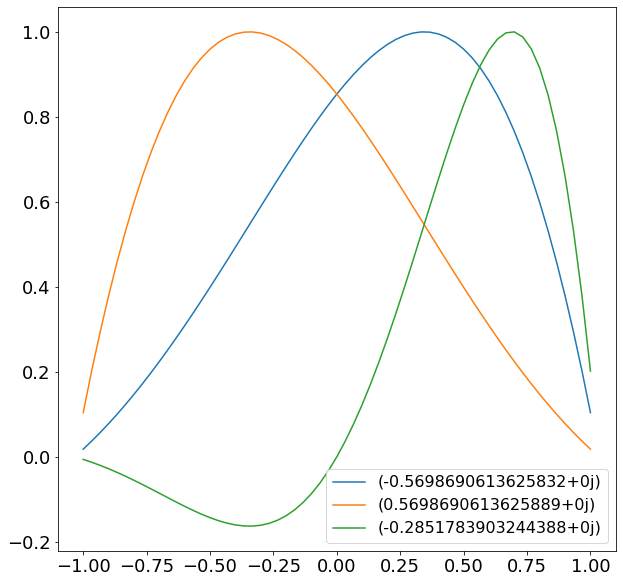

In [35]:
for i in range(3):
    plt.plot(x, V[:,i], label=e[i])
plt.legend();